# Posture detection using tensorflow判斷人體姿態<br>Step 5

##### In Step 4, we encapsulated some functions, and now we can directly input an image to obtain the result from MoveNet.<br>剛剛我們在Step 4中，封裝了一部分函數，我們現在已經可以直接輸入圖像獲取MoveNet的結果了。
However, we have arrived at Step 5. In order to reuse the function from Step 4, we need to export the code from Step 4 and then import it in Step 5.<br>
但是，我們來到了Step 5，爲了能讓我們再次使用Step 4的函數，我們需要將Step 4的代碼導出，然後在Step 5去import。

### Visualization of MoveNet results<br>Movenet結果可視化

##### Now that we can directly input an image to obtain MoveNet results. Similarly, we encapsulate the process of extracting keypoints and edges from an image using MoveNet into a function called `get_keypoints_and_edges_from_image_with_movenet(...)`. <br>我們現在已經可以直接輸入圖像獲取MoveNet的結果。類似地，我們將使用 MoveNet 從圖像中提取關鍵點和骨架的過程封裝到`get_keypoints_and_edges_from_image_with_movenet(...)` 的函數中。

In [11]:
input_path = "input_image.jpeg"

%run Squat_common.ipynb

Libraries imported.

The following functions have been imported:
   movenet(input_image)
   _keypoints_and_edges_for_display(keypoints_with_scores, height, width, keypoint_threshold=0.11)
   draw_prediction_on_image(image, keypoints_with_scores, crop_region=None, close_figure=False, output_image_height=None)
The following global variables have been assigned:
   module, model_name, input_size, KEYPOINT_DICT, KEYPOINT_EDGE_INDS_TO_COLOR



##### <hr><br>We can encapsulate the process from inputting image to producing output image into function `draw_output_from_image_with_movenet(...)`.<br>我們再把圖像輸入到輸出圖像結果的這一过程，封裝成`draw_output_from_image_with_movenet(...)`函數<br>
Steps we need to take 我們需要做哪些步驟：<br>
1. The `load_image_to_tf` function converts the input image to TensorFlow Tensor format.<br>
`load_image_to_tf` 函數將輸入的圖像轉換為 TensorFlow Tensor 格式。<br>
2. Use the `tf.cast` function to convert the tensor to the tf.int32 data type.<br>
使用 `tf.cast` 函數將張量轉換為 tf.int32 數據類型。
3. Use the `get_keypoints_with_scores_from_image_with_movenet` function to extract keypoints and confidence score from the `display_image`.<br>
使用 `get_keypoints_with_scores_from_image_with_movenet` 函數從 `display_image` 中提取關鍵點和置信度分數。
4. Use the `draw_prediction_on_image` function to draw keypoint prediction results on `display_image`.<br> 使用 `draw_prediction_on_image` 函數在 `display_image` 上繪製關鍵點預測結果。

(192, 192, 3)


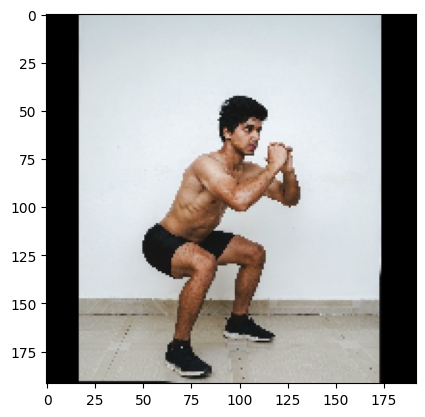

(1200, 1200, 3)
(1200, 1200, 3)


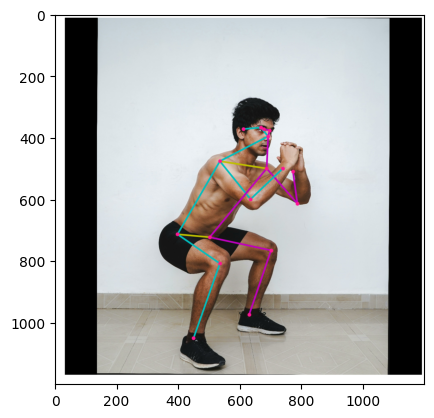

In [13]:

def draw_output_from_image_with_movenet(image):
    """Draws the keypoint predictions on image.
    
    Arg:
    image: can be Array of image, or a string of the path to the image

    Return: resultant image to be displayed in array format
    """
    display_image = load_image_to_tf(image)
    display_image = tf.image.resize_with_pad(display_image, 1200, 1200)
    display_image = tf.cast(display_image, dtype=tf.int32)
    output_overlay = draw_prediction_on_image(
        display_image, 
        get_keypoints_with_scores_from_image_with_movenet(display_image, input_size, input_size))
    return output_overlay

if __name__ == "__main__":
    image_converted = load_image_to_tf(input_path)
    input_image = tf_image_to_model(image_converted, input_size, input_size)
    show_image(input_image[0])
    show_image(draw_output_from_image_with_movenet(input_path))

##### To use OpenCV to display results in IPython, we also need to define function `view` using steps in Step 1.<br>爲了使用opencv在IPython顯示結果，我們還需要模仿Step 1的步驟定義`view`函數。

In [15]:
# Display function
# ================
def view( button, source=0, rotate=0, process=(lambda x:x) ):
    """
    Args:
    button: An IPywidget button to control the function. The display stops if button.value == True.
    Source: An optional integer or filename to specify the source of the video stream.
    Rotate: optional integer. Set to 0 by default (not rotated). Set to 1 will rotate by 90 deg.
    process: optional function that processes each frame through process(frame) before displaying.
        Set to identity function by default.
    """
    display_handle=display("Please wait...", display_id=True)
    
    cap = cv2.VideoCapture(source)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

    # print("something")
    
    while True:
        ret, frame = cap.read()
        if button.value==True or not ret:
            cap.release()
            display_handle.update(None)
            button.value = False
            break
        # frame = cv2.flip(frame, 1) # if your camera reverses your image

        # Rotate the frame if rotate==1
        if rotate:
            frame = cv2.transpose(frame)
            frame = cv2.flip(frame, 0)
        
        frame = process(frame)
        
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))

##### The following cell provides visualization of MoveNet from a given video source. You can test if the code is able to recognize poses.<br>下面的單元格提供來自給定視頻源的 MoveNet 可視化輸出結果。你可以測試代碼是否能實現姿態識別的功能。
Execution can be laggy due to matplotlib deployment, which is normal. <br>
matplotlib會導致執行影像緩慢，這是正常現象。

In [16]:
"""
this cell provides visualization of MoveNet result from a given video source
execution can be laggy due to matplotlib deployment

this cell is mainly for testing
"""

# Run
# ================
if __name__ == "__main__":
    display(stopButton)
    thread = threading.Thread(target=view, args=(
        stopButton,"Produce_2_direct.mp4", 0, draw_output_from_image_with_movenet))
    thread.start()


ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)


In [ ]:
def get_keypoints_and_edges_from_image_with_movenet(image, width, height):
    """
    Returns high confidence keypoints and edges from given image using MoveNet for visualization.
    
    Args:
    image: can be Array of image, or a string of the path to the image
    width: width of input image Model required
    height: height of input image Model required
    with_padding: if the result keeps edge padding. Normally if the input image
      to the MoveNet has padding but in display won't padding, with_padding = 0

    Returns:
    A (keypoints_xy, edges_xy, edge_colors) containing:
      * the absolute coordinates of all keypoints of all detected entities;
      * the absolute coordinates of all skeleton edges of all detected entities;
      * the colors in which the edges should be plotted.
    """
    keypoints_with_scores = get_keypoints_with_scores_from_image_with_movenet(image, width, height)
    keypoints_xy, edges_xy, edge_colors = _keypoints_and_edges_for_display(
        keypoints_with_scores, *load_image_to_tf(image).shape[:2])
    
    return keypoints_xy, edges_xy, edge_colors

In [ ]:
if __name__ != "__main__":
    print('''
The following functions have been imported:
   get_keypoints_and_edges_from_image_with_movenet(image, width, height)
   draw_output_from_image_with_movenet(image)
   view( button, source=0, rotate=0, process=(lambda x:x) )
=======================================
    ''')